# Time Series Analysing Of World War Data

## In this Notebook We will deal with aerial bombing operations and weather conditions in world war 2

In [1]:
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import os
#print(os.listdir("../input"))
import warnings            
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style.

## Load the Data

### Aerial Bombing Operations 
### Shortly, this data includes bombing operations. For example, USA who use ponte olivo airfield bomb Germany (Berlin) with A36 air craft in 1945.

In [2]:
# bombing data
aerial = pd.read_csv("operations.csv")
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("Weather Station Locations.csv")
# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("Summary of Weather.csv")

## Data Cleaning

### Aerial bombing Data description:
### Mission Date: Date of mission
### Theater of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years"
### Country: Country that makes mission or operation like USA
### Air Force: Name or id of air force unity like 5AF
### Aircraft Series: Model or type of aircraft like B24
### Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.
### Takeoff Base: Takeoff airport name like Ponte Olivo Airfield
### Takeoff Location: takeoff region Sicily
### Takeoff Latitude: Latitude of takeoff region
### Takeoff Longitude: Longitude of takeoff region
### Target Country: Target country like Germany
### Target City: Target city like Berlin
### Target Type: Type of target like city area
### Target Industry: Target industy like town or urban
### Target Priority: Target priority like 1 (most)
### Target Latitude: Latitude of target
### Target Longitude: Longitude of target

### Weather Condition data description:

### Weather station location:
### WBAN: Weather station number
### NAME: weather station name
### STATE/COUNTRY ID: acronym of countries
### Latitude: Latitude of weather station
### Longitude: Longitude of weather station

### Weather:

### STA: eather station number (WBAN)
### Date: Date of temperature measurement
### MeanTemp: Mean temperature

## Data Cleaning

### Aerial Bombing data includes a lot of NaN value. Instead of usign them, I drop some NaN values. It does not only remove the uncertainty but it also easa visualization process.

### Drop countries that are NaN
### Drop if target longitude is NaN
### Drop if takeoff longitude is NaN
### Drop unused features

### Weather Condition data does not need any cleaning. According to exploratory data analysis and visualization, we will choose certain location to examine deeper. However, lets put our data variables what we use only.

In [3]:
# drop countries that are NaN
aerial = aerial[pd.isna(aerial.Country)==False]
# drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']

#aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [4]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 178202
Data columns (total 46 columns):
Mission ID                               2942 non-null int64
Mission Date                             2942 non-null object
Theater of Operations                    2763 non-null object
Country                                  2942 non-null object
Air Force                                2892 non-null object
Unit ID                                  2865 non-null object
Aircraft Series                          2915 non-null object
Callsign                                 10 non-null object
Mission Type                             537 non-null object
Takeoff Base                             2942 non-null object
Takeoff Location                         2942 non-null object
Takeoff Latitude                         2942 non-null object
Takeoff Longitude                        2942 non-null float64
Target ID                                990 non-null object
Target Country             

In [5]:

weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [6]:

weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


## Data Visualization

### We visualize the data  to understand 

### How many country which attacks
### Top target countries
### Top 10 aircraft series
### Takeoff base locations (Attack countries)
### Target locations
### Bombing paths
### Theater of Operations
### Weather station locations

USA              1895
GREAT BRITAIN     931
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


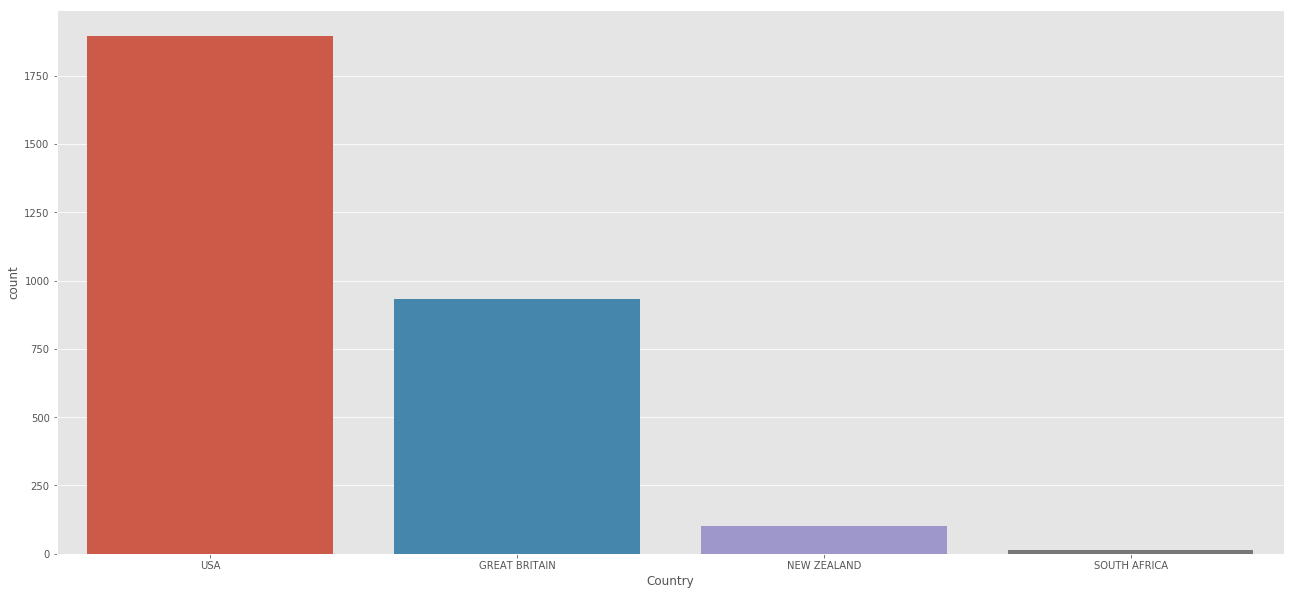

In [7]:
# country
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])
plt.show()

ITALY      1114
BURMA       335
LIBYA       272
GREECE      228
TUNISIA     113
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      42
Name: Target Country, dtype: int64


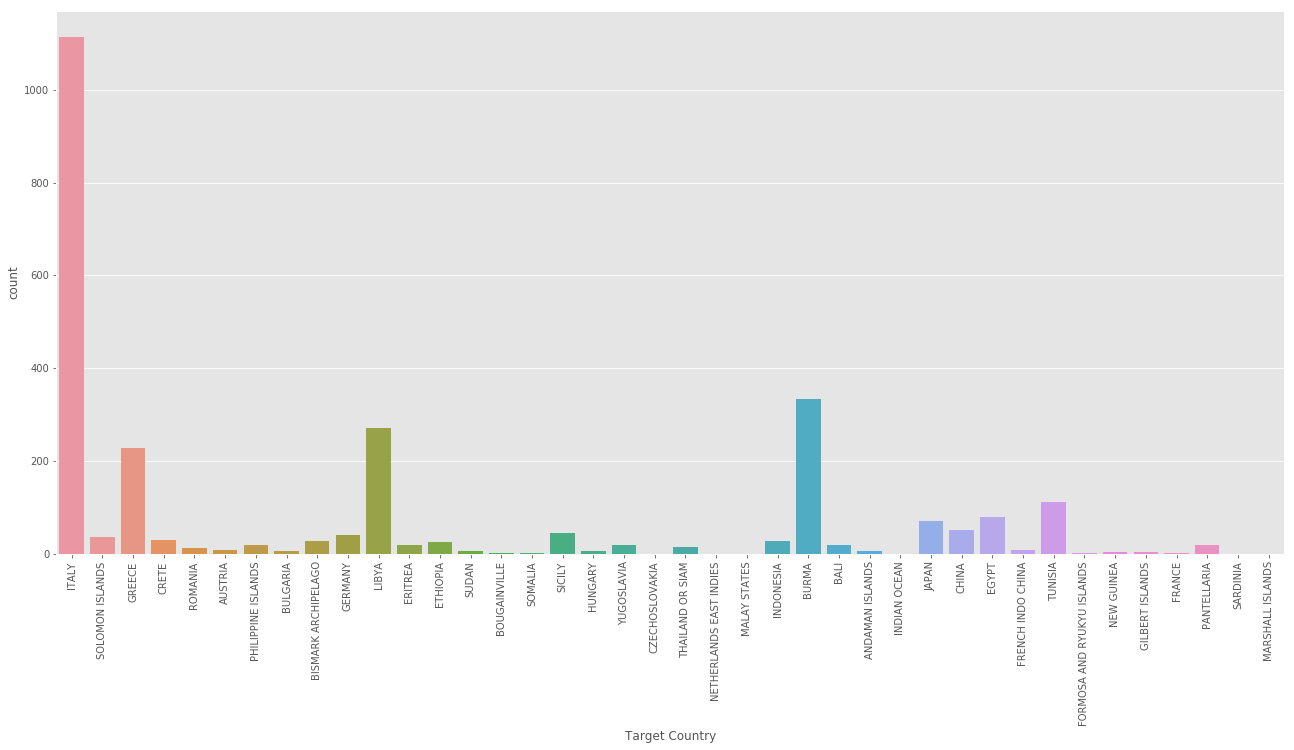

In [8]:
# Top target countries
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()


In [9]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

A36             990
LIB             532
B25             416
B24             337
BLEN            180
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


### Most used air Craft : A36
![](image.png)

### Now lets visualize take off bases of countries who attack
### In plot below, blue color draw the attention, it is USA and red color is Great Britain

In [10]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
#fig = go.Figure(data=data, layout=layout)
#iplot(fig)

### Lets visualize bombing paths which country from which take off base bomb the which countries and cities.

In [11]:
# Bombing paths
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]

targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
        

flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
    
#fig = dict( data=flight_paths + airports+targets, layout=layout )
#iplot( fig )

### As you ca see from bombing paths, most of the bombing attack is done in Mediterranean theater of operations. Theater of Operations:

### ETO: European Theater of Operations
### PTO: Pasific Theater of Operations
### MTO: Mediterranean Theater of Operations
### CBI: China-Burma-India Theater of Operations
### EAST AFRICA: East Africa Theater of Operations

MTO            1991
CBI             425
PTO             247
ETO              63
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


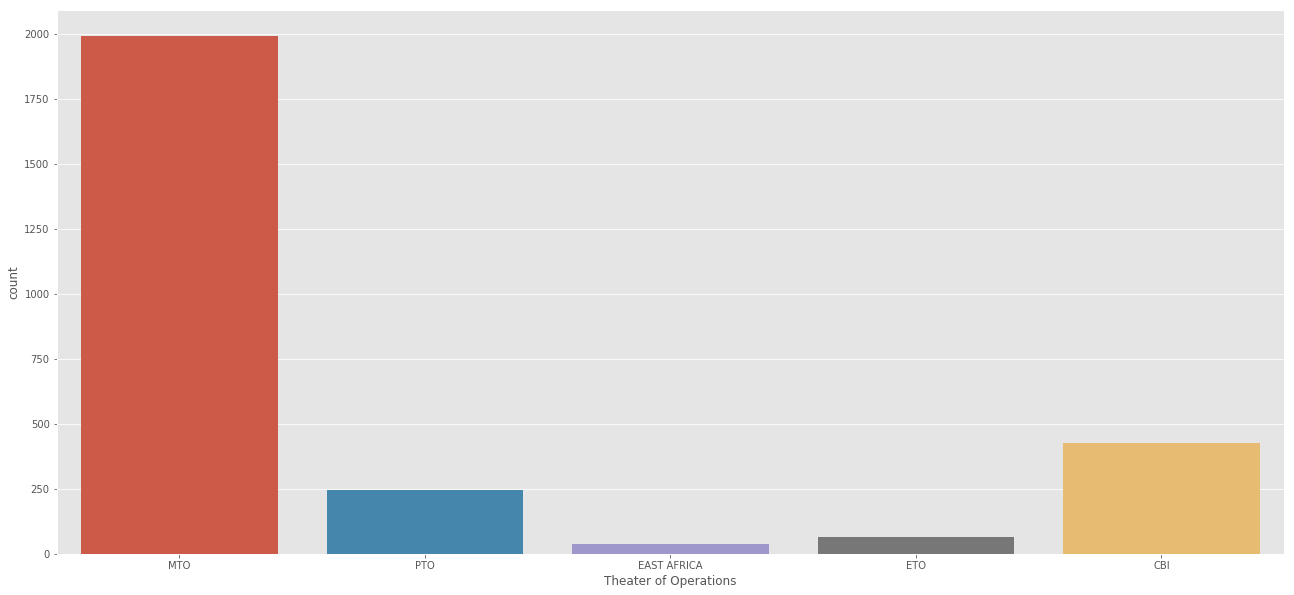

In [12]:
#Theater of Operations
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

### Weather Station locations

In [13]:
# weather station locations

data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
#fig = go.Figure(data=data, layout=layout)
#iplot(fig)

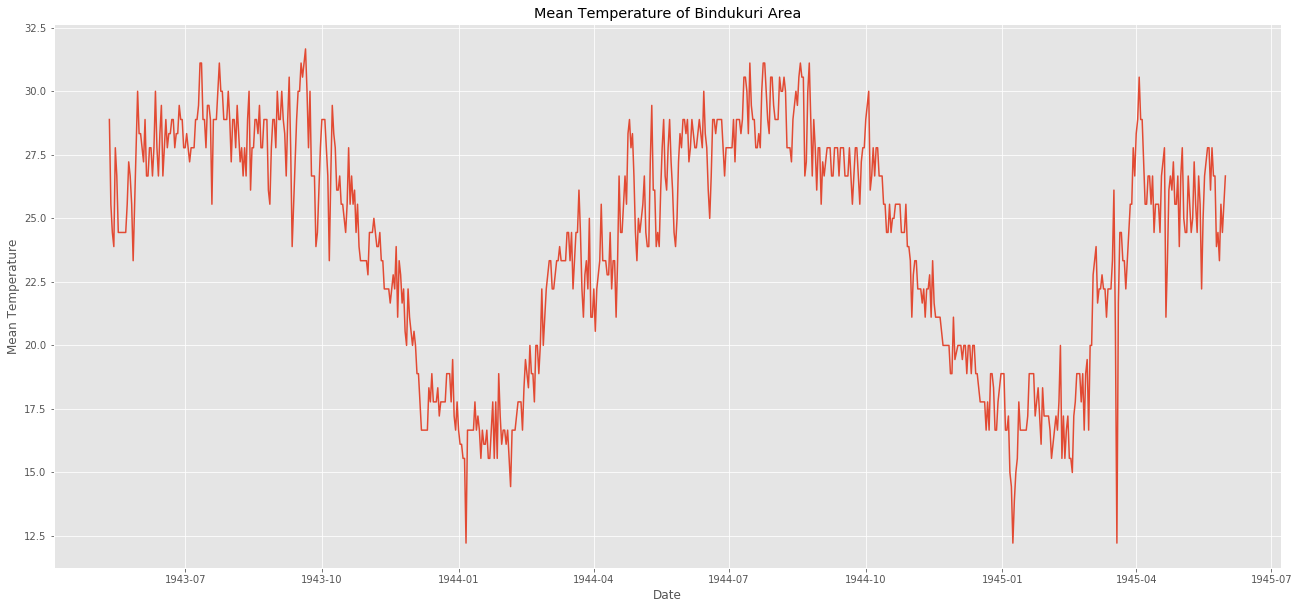

In [14]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [15]:
aerial = pd.read_csv("operations.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

In [16]:

liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

#fig = dict(data = data, layout = layout)
#iplot(fig)

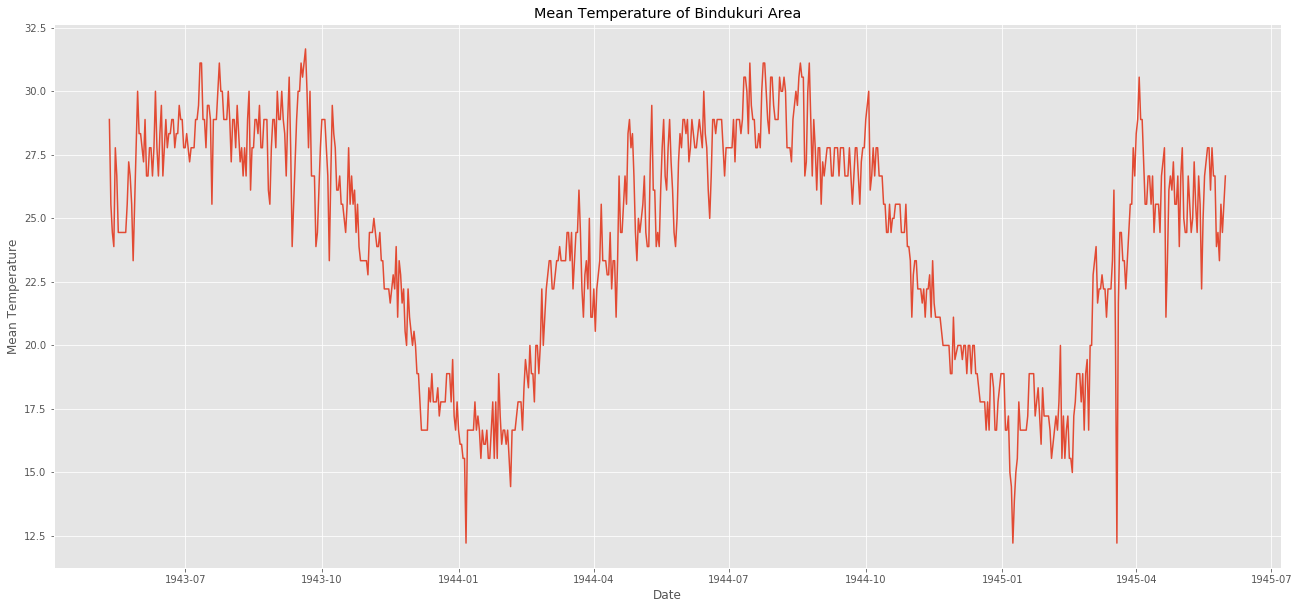

In [17]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

In [18]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = pd.rolling_mean(ts, window=6)
    rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
#check_mean_std(ts)
#check_adfuller(ts.MeanTemp)

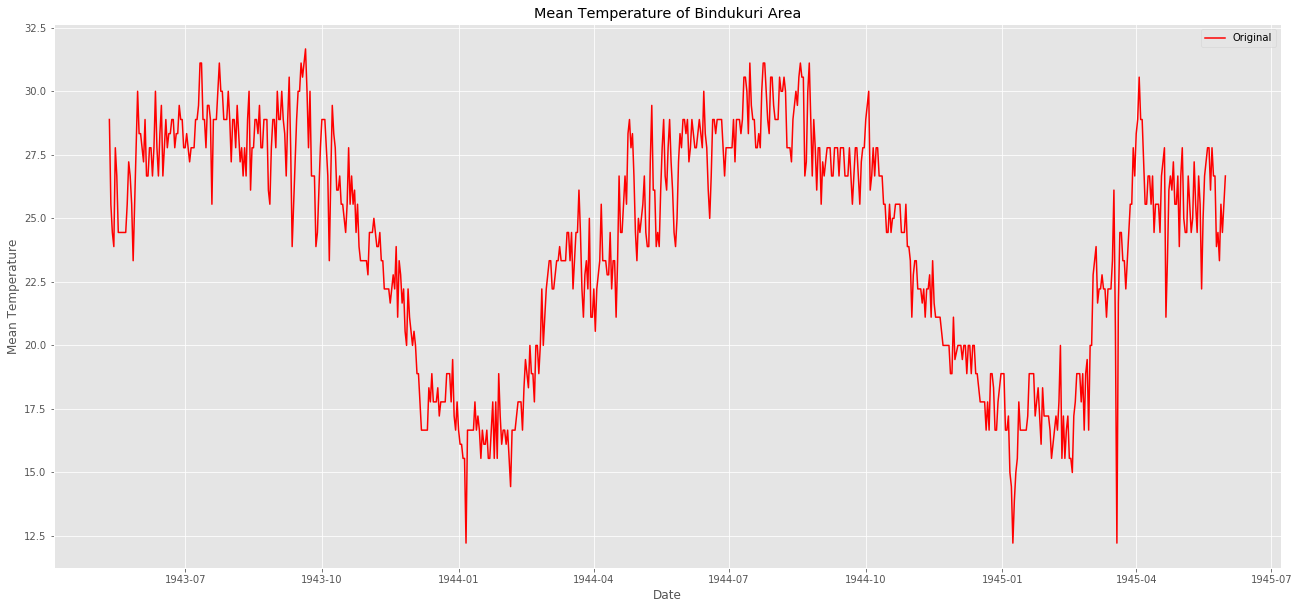

In [19]:
# Moving average method
window_size = 6
#moving_avg = pd.rolling_mean(ts,window_size)
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
#plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [20]:
#ts_moving_avg_diff = ts - moving_avg
#ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
#check_mean_std(ts_moving_avg_diff)
#check_adfuller(ts_moving_avg_diff.MeanTemp)

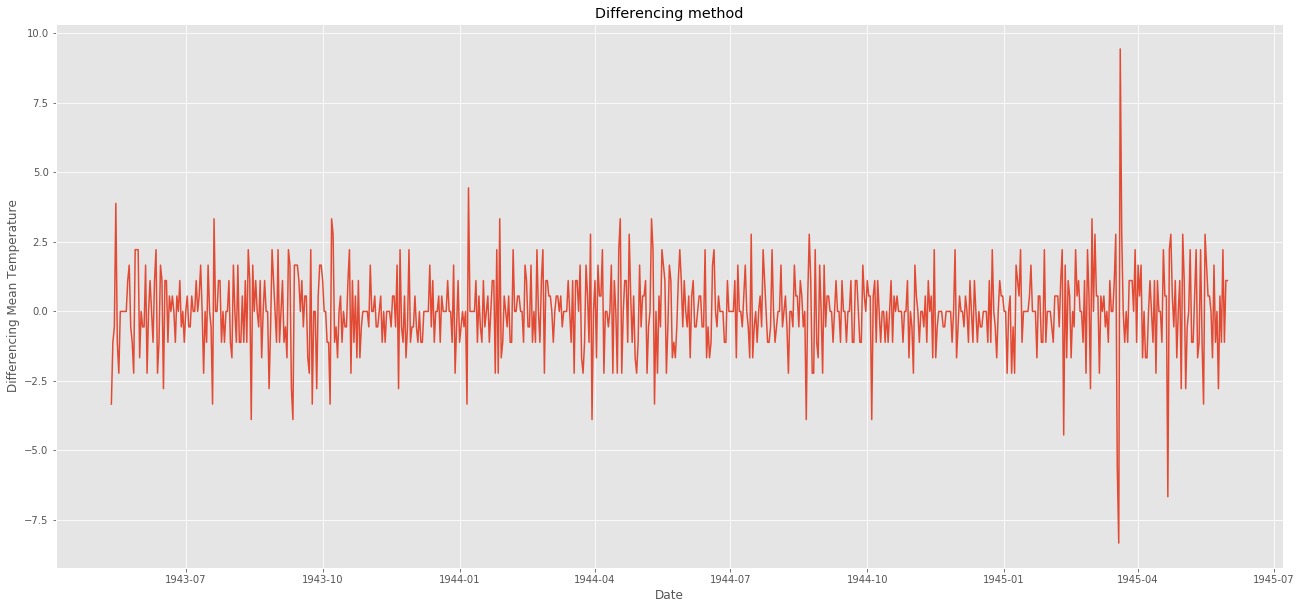

In [21]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [22]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
#check_mean_std(ts_diff)
#check_adfuller(ts_diff.MeanTemp)

## Forecasting a Time Series

### We learn two different methodsthat are moving average and differencing methods to avoid trend and seasonality problem

### For prediction(forecasting) we will use ts_diff time series that is result of differencing method. There is no reason I only choose it.

### Also prediction method is ARIMA that is Auto-Regressive Integrated Moving Averages.
### AR: Auto-Regressive (p): AR terms are just lags of dependent variable. For example lets say p is 3, we will use x(t-1), x(t-2) and x(t-3) to predict x(t)
### I: Integrated (d): These are the number of nonseasonal differences. For example, in our case we take the first order difference. So we pass that variable and put d=0
### MA: Moving Averages (q): MA terms are lagged forecast errors in prediction equation.

### (p,d,q) is parameters of ARIMA model.
### In order to choose p,d,q parameters we will use two different plots.
### Autocorrelation Function (ACF): Measurement of the correlation between time series and lagged version of time series.
### Partial Autocorrelation Function (PACF): This measures the correlation between the time series and lagged version of time series but after eliminating the variations already explained by the intervening comparisons.

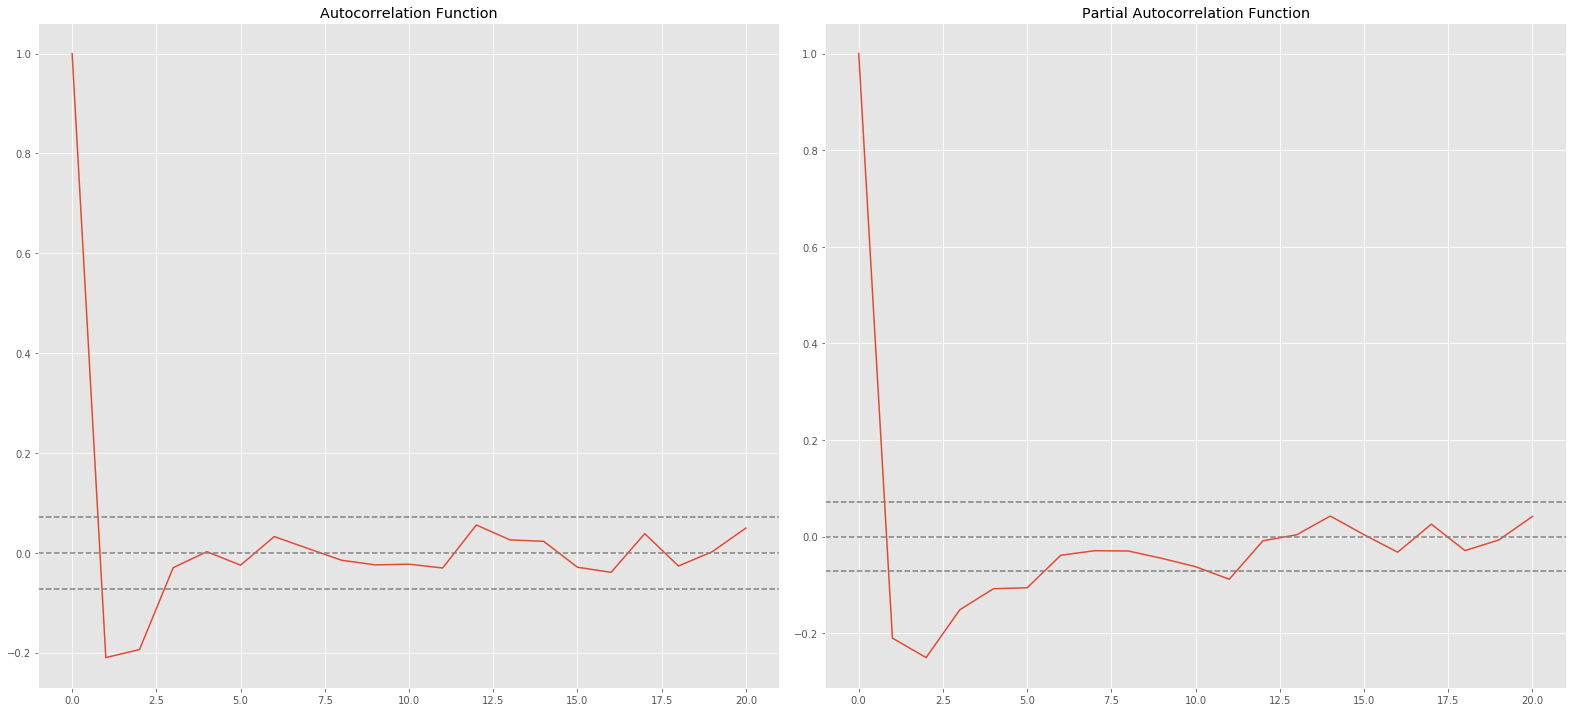

In [23]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values

### Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time. p=1.
### Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time. q=1.

### Now lets use (1,0,1) as parameters of ARIMA models and predict

### ARIMA: from statsmodels libarary
### datetime: we will use it start and end indexes of predict method

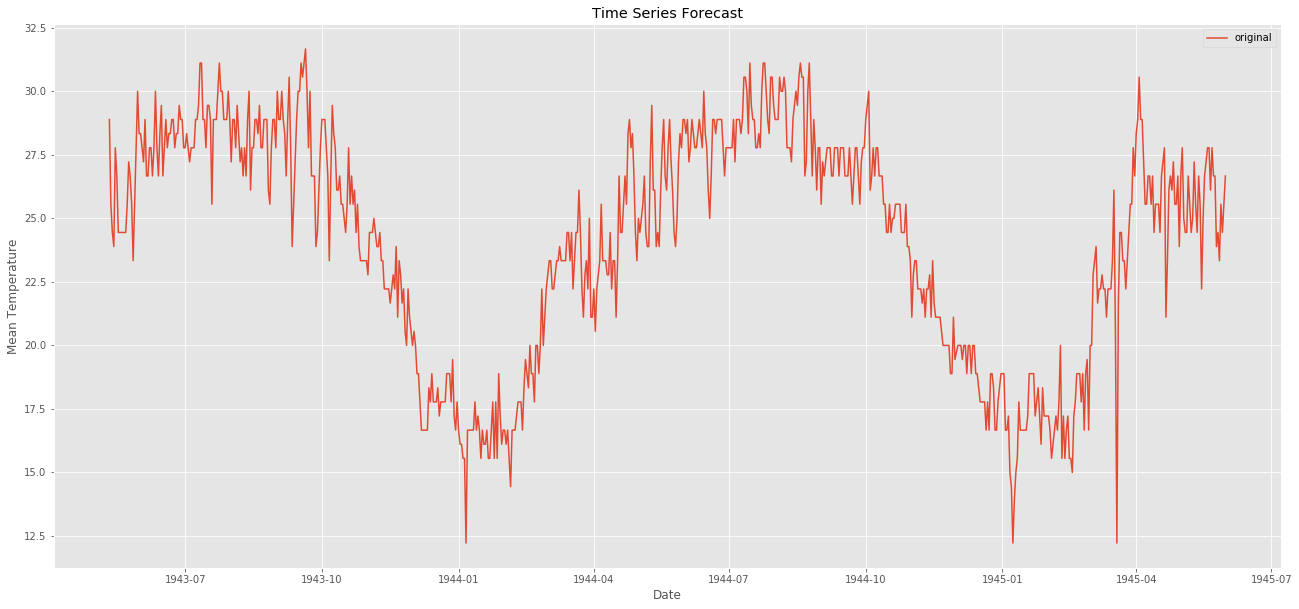

In [24]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)
#forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
#plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

### lets predict and visualize all path and find mean squared error

error:  1.8625822161326346


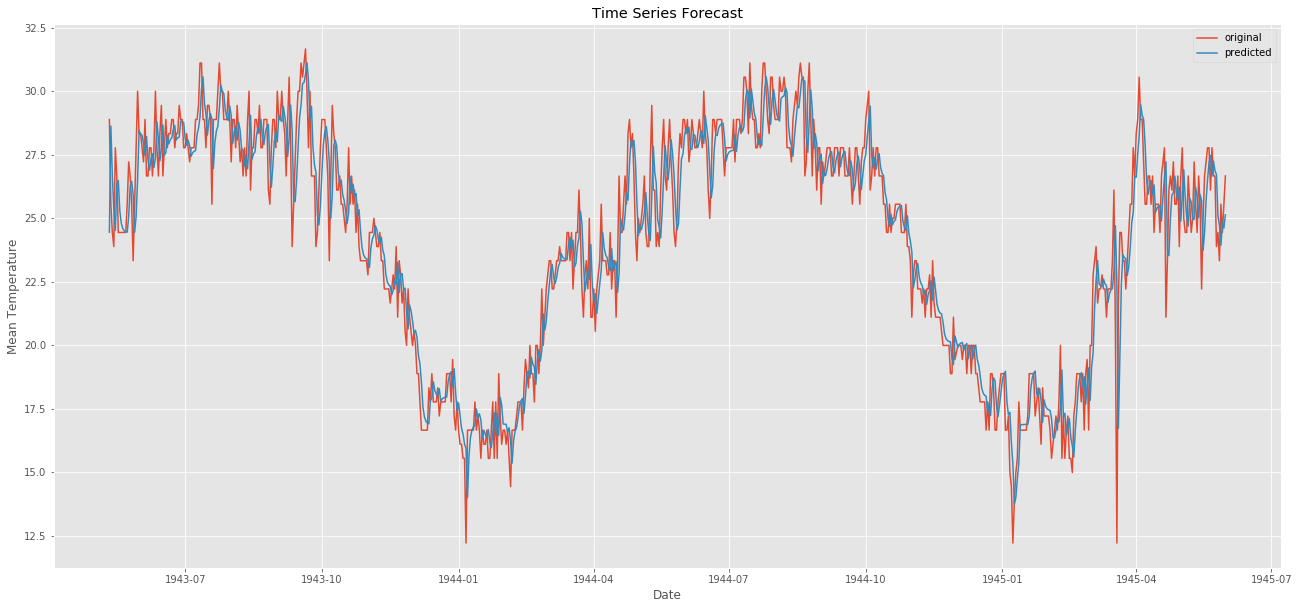

In [25]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()